In [33]:
import numpy as np
import matplotlib.pyplot as plt
import os
from pathlib import Path

In [34]:
%load_ext autoreload
%aimport pipeline
%autoreload 1

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [35]:
obj_name = 'HF22'
Te_corr = 3000
random_seed = 42
PDF_name = 'figures/{}_{}'.format(obj_name, Te_corr)
data_dir = Path(os.environ['MUSE_DATA']) / Path('{}/maps'.format(obj_name))
save_plots = True

In [36]:
PL = pipeline.PipeLine(data_dir = data_dir,
                       obj_name = obj_name, 
                       error_str='error', err_default=0.05,
                       random_seed=random_seed,
                       flux_normalisation=1e-20)

PL.log_.level=1

PL.obs.addSum(('O1r_7771A', 'O1r_7773A', 'O1r_7775A'), 'O1r_7773+')

PL.obs.removeLine('O1r_7771A')
PL.obs.removeLine('O1r_7773A')
PL.obs.removeLine('O1r_7775A')
PL.obs.getLine(label='O2r_4649.13A').to_eval = 'L(4649.13) + L(4650.84)'

PL.add_MC(150)

PL.obs.def_EBV()
PL.red_cor_obs(EBV_min = 0., plot_=False)    

PL.correc_NII(Te_corr)
PL.correc_OII(Te_corr, rec_label='O2r_4649.13A')
PL.read_TeNe('{}/PipelineResults/{}_{}_TeNe.pickle.gz'.format(os.environ['MUSE_DATA'], obj_name, Te_corr))
PL.read_abunds('{}/PipelineResults/{}_{}_abunds.pickle.gz'.format(os.environ['MUSE_DATA'], obj_name, Te_corr))

/Users/christophemorisset/Google Drive/Pro/PyNeb_devel/pyneb/core/pynebcore.py:4537: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  data_tab = np.genfromtxt(obsFile, dtype=None, delimiter=delimiter, names=True)
/Users/christophemorisset/Google Drive/Pro/PyNeb_devel/pyneb/core/pynebcore.py:4748: RuntimeWarning: invalid value encountered in true_divide
  obs_over_theo = (line1.obsIntens / line2.obsIntens) / r_theo
/Users/christophemorisset/Google Drive/Pro/PyNeb_devel/pyneb/extinction/red_corr.py:300: RuntimeWarning: divide by zero encountered in log10
  self.E_BV = 2.5 * np.log10(obs_over_theo) / (f1 - f2)


/Users/christophemorisset/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,


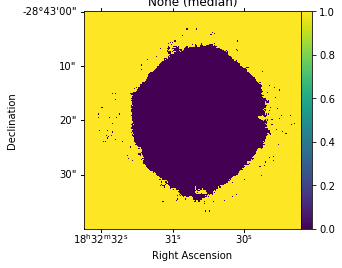

In [37]:
Hb = PL.get_image(label='H1r_4861A', type_='median')
maskHb = np.where(Hb > (np.nanmax(Hb)/ 100), False, True)
f,ax = plt.subplots(1, 1, figsize=(5, 4), subplot_kw={'projection': PL.obs.wcs})
PL.plot(ax=ax, image=maskHb);

In [38]:
try:
    with np.errstate(divide='ignore', invalid='ignore'):
        PL.red_cor_obs(EBV_min = 0., plot_=False, label1="H1r_6561.0", label2="H1r_4860.0")    
        cHbetas = PL.obs.extinction.cHbeta
        PL.red_cor_obs(EBV_min = 0., plot_=False, label1="H1r_6563A", label2="H1r_4861A")    
        cHbeta = PL.obs.extinction.cHbeta
        f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 7), subplot_kw={'projection': PL.obs.wcs})
        PL.plot(ax=ax1, data=cHbetas, vmin=0.5, vmax=1.2, title='cHbeta short', type_='orig',
                    label_cut=('H1r_6563A', 'H1r_4861A'), SN_cut=2.5)
        PL.plot(ax=ax2, data=cHbeta, vmin=0.5, vmax=1.2, title='cHbeta long', type_='orig',
                    label_cut=('H1r_6563A', 'H1r_4861A'), SN_cut=2.5)
        PL.plot(ax=ax3, data=cHbetas/cHbeta, vmin=0.5, vmax=1.2, title='cHbeta s/l', type_='orig',
                    label_cut=('H1r_6563A', 'H1r_4861A'), SN_cut=2.5)
except:
    pass

ERROR Observation: None is not a valid label or is not observed


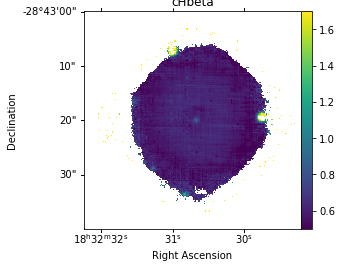

In [39]:
f,ax = plt.subplots(1, 1, figsize=(5, 4), subplot_kw={'projection': PL.obs.wcs})
PL.plot(ax=ax, image=PL.get_image(PL.obs.extinction.cHbeta, type_='orig'), vmin=0.5, vmax=1.7, title='cHbeta',
            label_cut=('H1r_6563A', 'H1r_4861A'), mask=maskHb)
if save_plots:
    f.savefig(PDF_name+'_cHbeta.pdf')

/Users/christophemorisset/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,


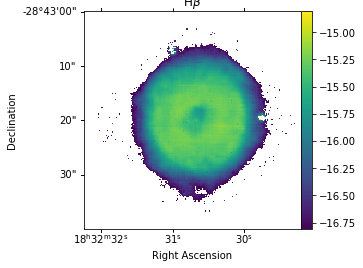

In [40]:
f,ax = plt.subplots(1, 1, figsize=(5, 4), subplot_kw={'projection': PL.obs.wcs})
PL.plot(ax=ax, label='H1r_4861A', title=r'H$\beta$', use_log=True, mask=maskHb)
if save_plots:
    f.savefig(PDF_name+'_Hbeta.pdf')

/Users/christophemorisset/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,


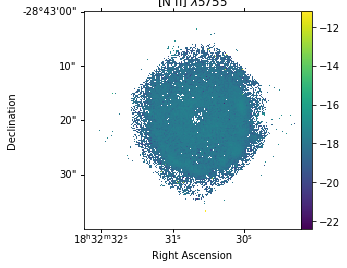

In [41]:
f,ax = plt.subplots(1, 1, figsize=(5, 4), subplot_kw={'projection': PL.obs.wcs})
PL.plot(ax=ax, label='N2_5755A', title=r'[N II] $\lambda$5755', use_log=True, mask=maskHb)
if save_plots:
    f.savefig(PDF_name+'_NII5755.pdf')

/Users/christophemorisset/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,


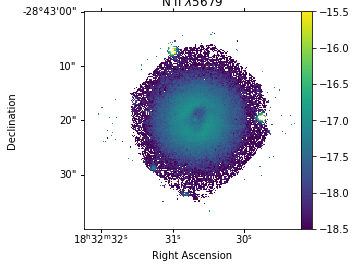

In [42]:
f,ax = plt.subplots(1, 1, figsize=(5, 4), subplot_kw={'projection': PL.obs.wcs})
PL.plot(ax=ax, label='N2r_5679.56A', title=r'N II $\lambda$5679', use_log=True, mask=maskHb, vmin=-18.5, vmax=-15.5)
if save_plots:
    f.savefig(PDF_name+'_NII5679.pdf')

/Users/christophemorisset/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,


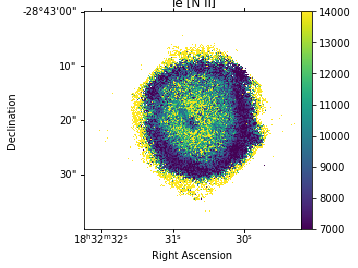

In [43]:
SN_cut = None
vmin = 7000
vmax = 14000
f, ax = plt.subplots(1, 1, subplot_kw={'projection': PL.obs.wcs}, figsize=(5,4))
PL.plot(ax=ax, data=PL.TeNe['N2S2']['Te'], title='Te [N II]', vmin=vmin, vmax=vmax, type_='median', mask=maskHb)
if save_plots:
    f.savefig(PDF_name+'_TeN2.pdf')

/Users/christophemorisset/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,


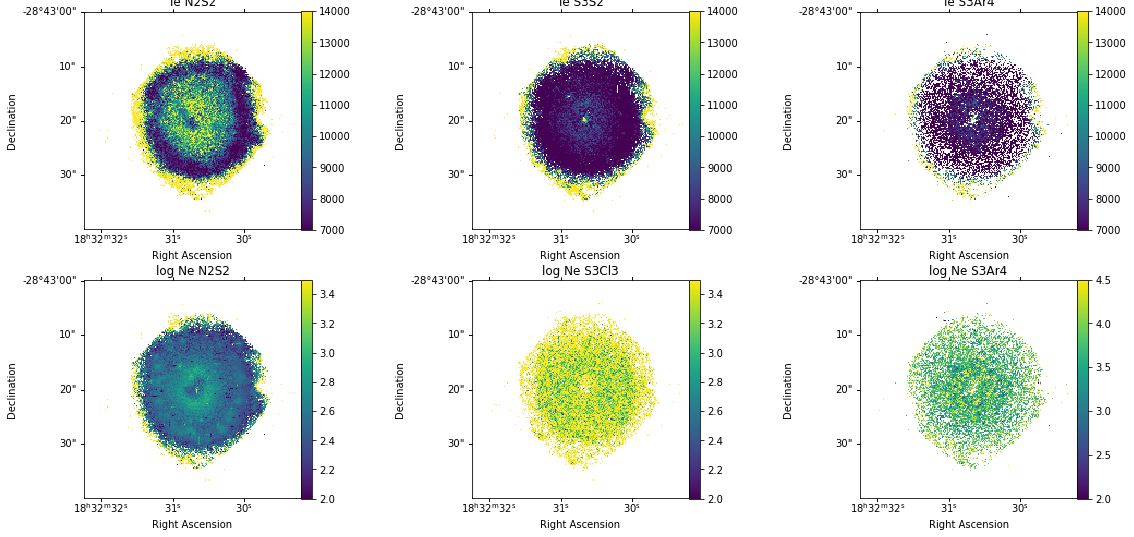

In [44]:
SN_cut = None
vmin = 7000
vmax = 14000
f, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, subplot_kw={'projection': PL.obs.wcs}, figsize=(18,12))
PL.plot(ax=ax1, data=PL.TeNe['N2S2']['Te'], title='Te N2S2', vmin=vmin, vmax=vmax, 
        label_cut=('N2_6548A', 'N2_5755A', 'S2_6716A', 'S2_6731A'), SN_cut=SN_cut, type_='median', mask=maskHb)
PL.plot(ax=ax2, data=PL.TeNe['S3S2']['Te'], title='Te S3S2', vmin=vmin, vmax=vmax, 
        label_cut=('S3_9069A', 'S3_6312A', 'S2_6716A', 'S2_6731A'), SN_cut=SN_cut, type_='median', mask=maskHb)
PL.plot(ax=ax3, data=PL.TeNe['S3Ar4']['Te'], title='Te S3Ar4', vmin=vmin, vmax=vmax, 
        label_cut=('S3_9069A', 'S3_6312A', 'Ar4_4711A', 'Ar4_4740A'), SN_cut=None, type_='median', mask=maskHb)
PL.plot(ax=ax4, data=np.log10(PL.TeNe['N2S2']['Ne']), title='log Ne N2S2', vmin=2, vmax=3.5, 
        label_cut=('N2_6548A', 'N2_5755A', 'S2_6716A', 'S2_6731A'), SN_cut=SN_cut, type_='median', mask=maskHb)
PL.plot(ax=ax5, data=np.log10(PL.TeNe['S3Cl3']['Ne']), title='log Ne S3Cl3', vmin=2, vmax=3.5, 
        label_cut=('S3_9069A', 'S3_6312A', 'Cl3_5518A', 'Cl3_5538A'), SN_cut=SN_cut, type_='median', mask=maskHb)
PL.plot(ax=ax6, data=np.log10(PL.TeNe['S3Ar4']['Ne']), title='log Ne S3Ar4', vmin=2, vmax=4.5, 
        label_cut=('S3_9069A', 'S3_6312A', 'Ar4_4711A', 'Ar4_4740A'), SN_cut=None, type_='median', mask=maskHb)
f.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.7, hspace=-0.3)
if save_plots:
    f.savefig(PDF_name+'_TeNe.pdf')

In [45]:
line_labels = ('He1r_6678A', 'He2r_4686A', 'C1_8728A', 'C2r_6462.0A', 'N1_5199A+', 
               'N2_6548A', 'N2r_5679.56A', 'O1_6300A', 'O1r_7773+', 'O2_7330A+',
               'O2r_4649.13A', 'O3_4959A', 'S2_6731A', 'S3_9069A',
               'Cl3_5518A', 'Cl4_7531A', 'Ar3_7136A', 'Ar4_4740A', 'Ar5_7005A')

/Users/christophemorisset/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
<ipython-input-46-ffbe71f04f0b>:6: RuntimeWarning: divide by zero encountered in log10
  im = np.log10(PL.get_image(label=line.label, type_='median', returnObs=True))
<ipython-input-46-ffbe71f04f0b>:6: RuntimeWarning: invalid value encountered in log10
  im = np.log10(PL.get_image(label=line.label, type_='median', returnObs=True))


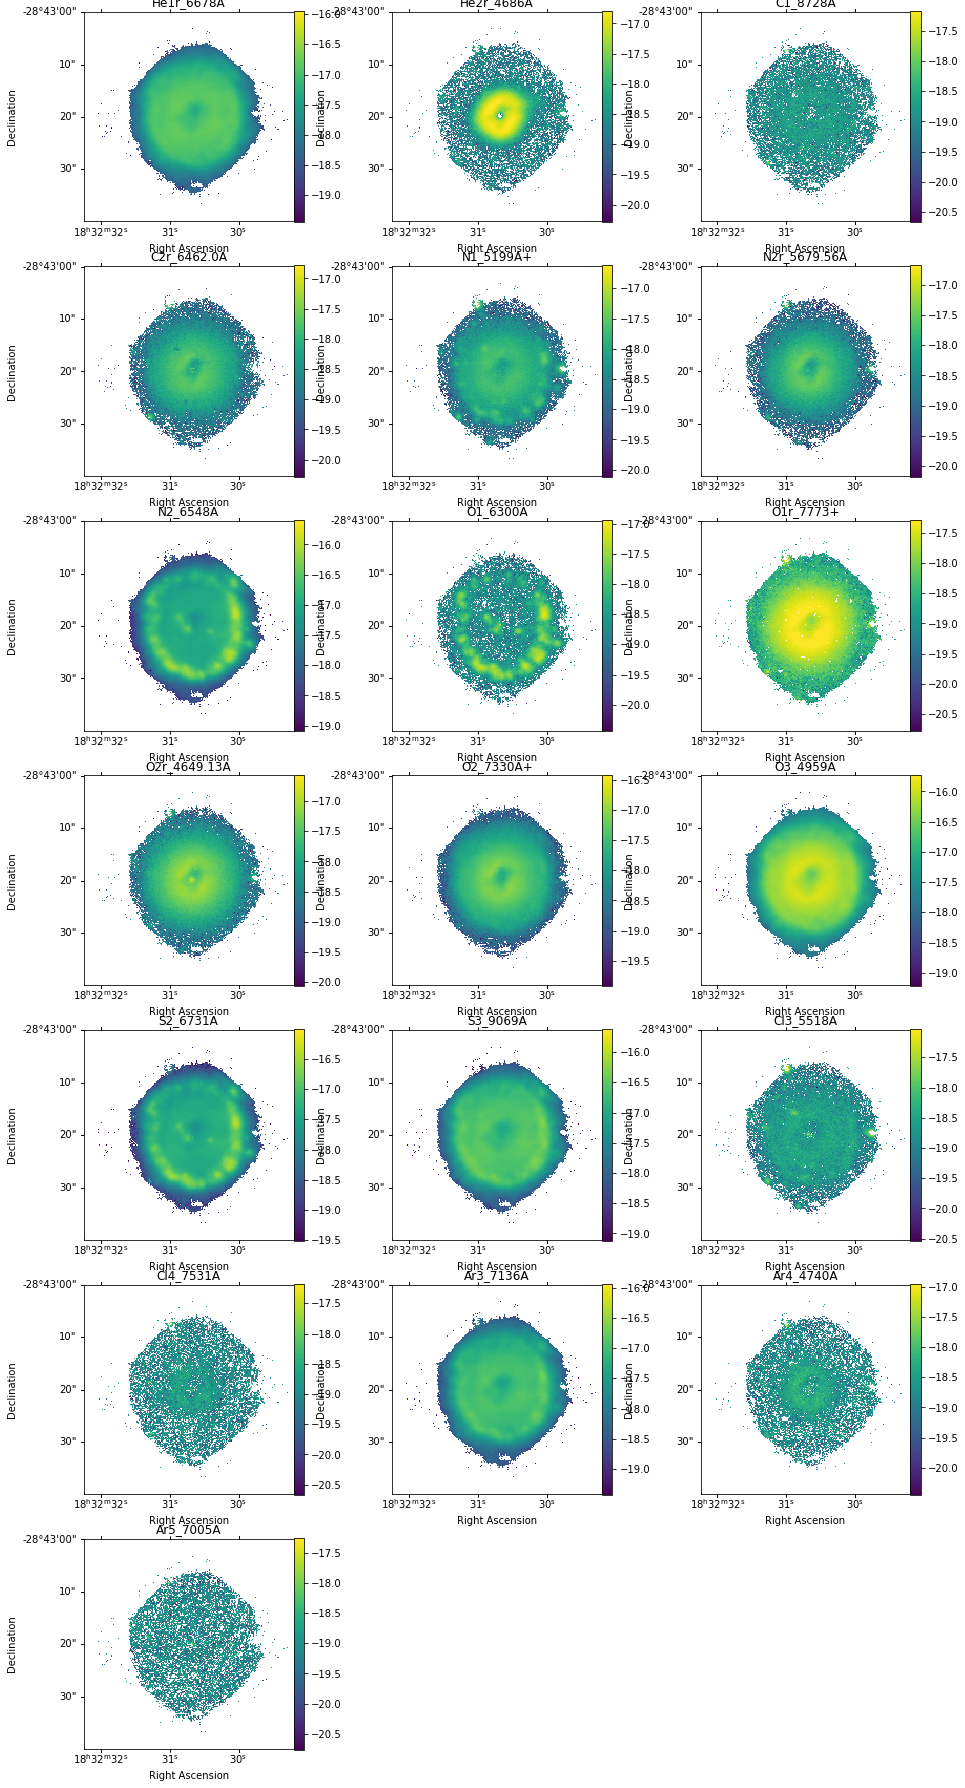

In [46]:
f, axes = plt.subplots(7,3,figsize=(15,32), subplot_kw={'projection': PL.obs.wcs})
i_axes = 0
for line in PL.obs.getSortedLines(crit='mass'):
    if line.label in line_labels:
        if line.is_valid:
            im = np.log10(PL.get_image(label=line.label, type_='median', returnObs=True))
            im[np.isinf(im)] = np.nan
            mask = PL.get_mask_SN(label=line.label, SN_cut=2.5)
            med = np.nanmedian(im[~mask])
            PL.plot(label=line.label, title=line.label, ax=axes.ravel()[i_axes], 
                    type_='orig', use_log=True, vmin=med-2, vmax=med+1.5, returnObs=True, mask=maskHb)
            i_axes += 1
        else:
            print('{} is invalid'.format(line.label))
axes.ravel()[-2].remove()
axes.ravel()[-1].remove()
f.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=0.2)
if save_plots:
    f.savefig(PDF_name+'_fluxes.pdf')


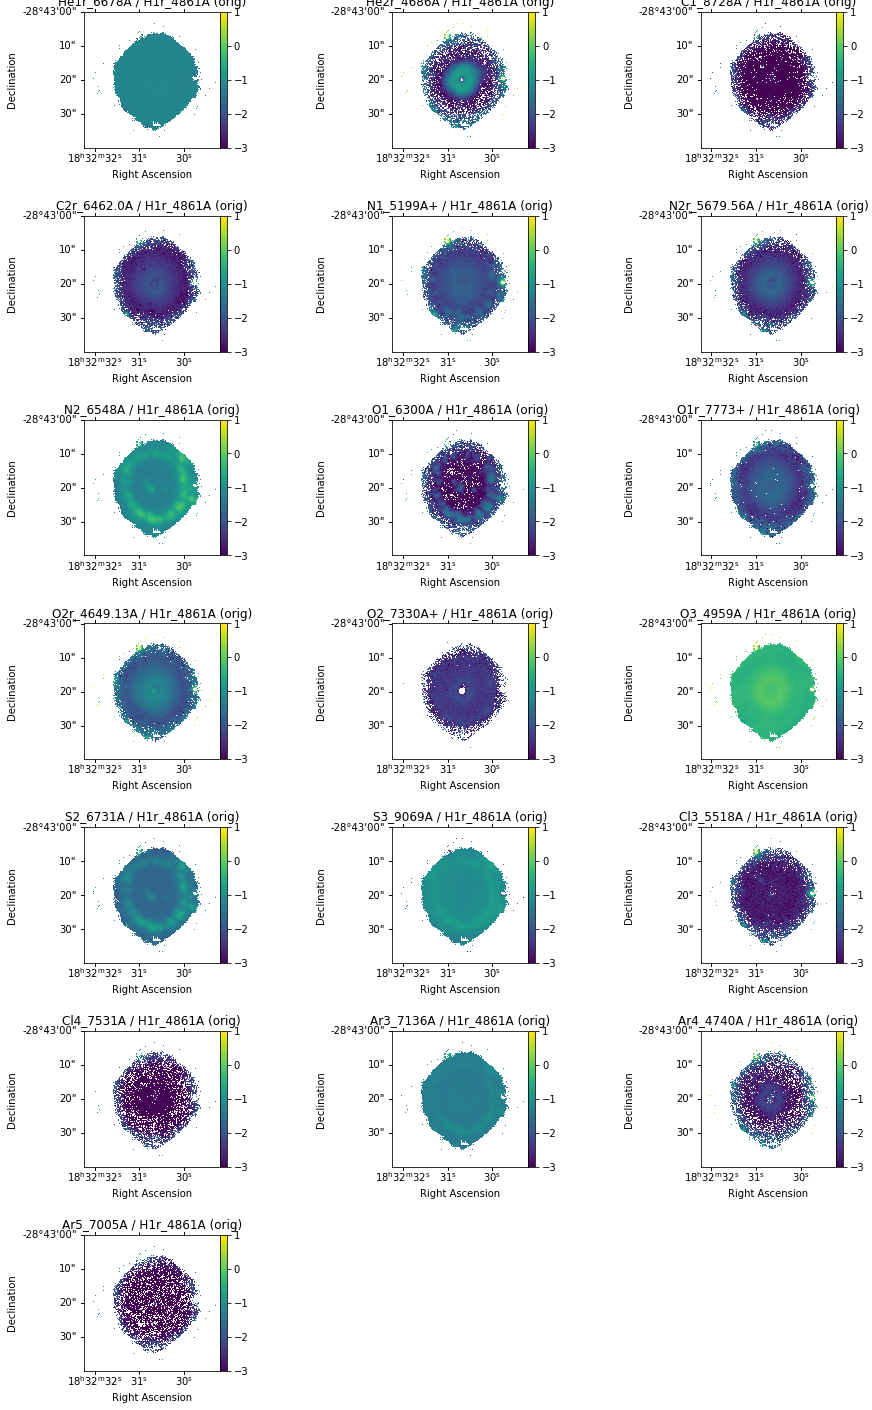

In [47]:
f, axes = plt.subplots(7,3,figsize=(15,25), subplot_kw={'projection': PL.obs.wcs})
i_axes = 0
for line in PL.obs.getSortedLines(crit='mass'):
    if line.label in line_labels:
        if line.is_valid:
            PL.plot(label=(line.label,'H1r_4861A'), ax=axes.ravel()[i_axes], type_='orig', 
                    use_log=True, vmin=-3, vmax=1, mask=maskHb)
            i_axes += 1
        else:
            print('{} is invalid'.format(line.label))
axes.ravel()[-2].remove()
axes.ravel()[-1].remove()
f.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=0.5)
if save_plots:
    f.savefig(PDF_name+'_fluxesNorm.pdf')


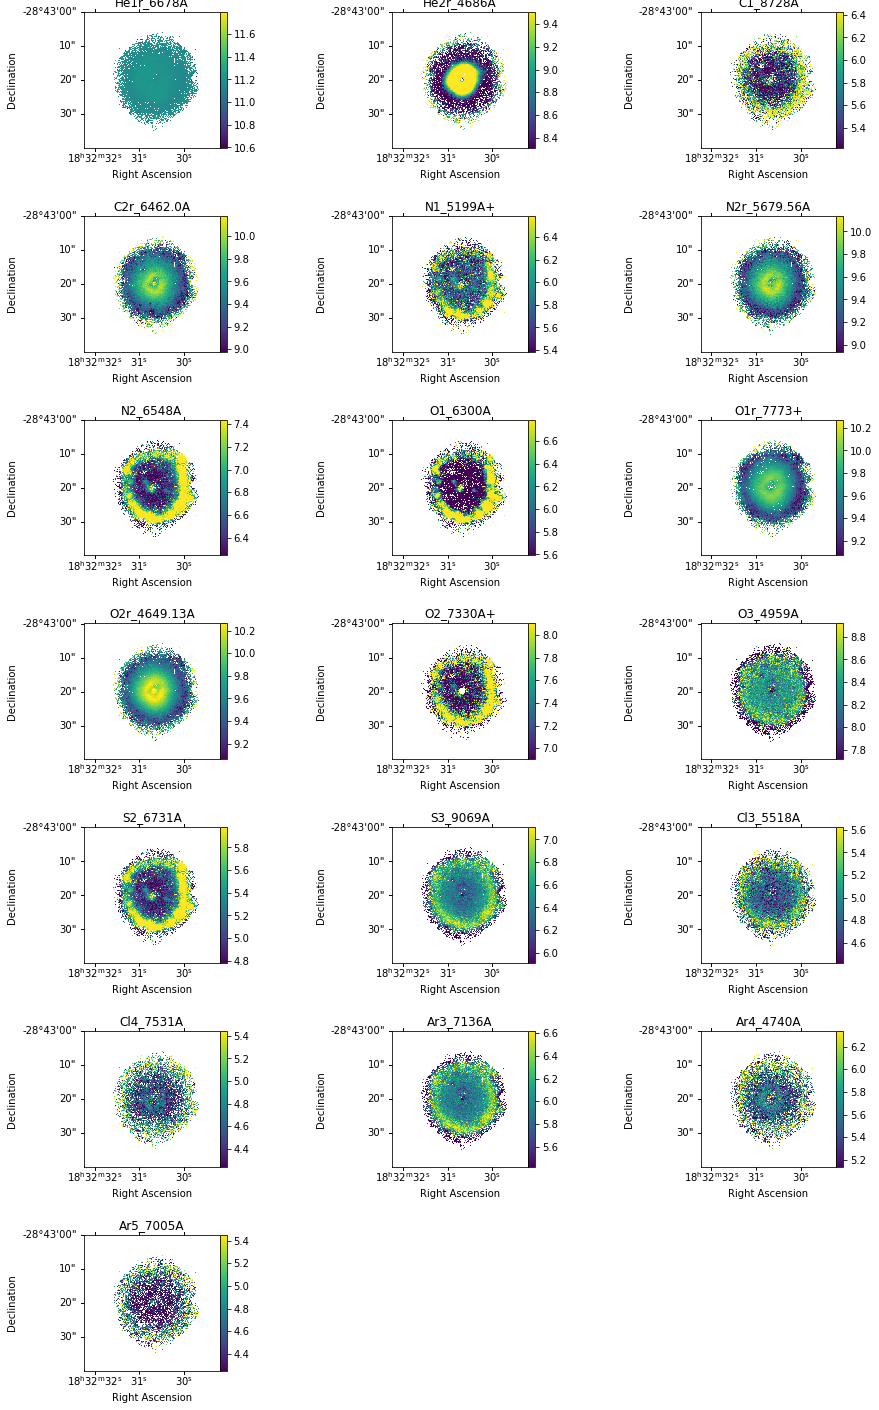

In [48]:
f, axes = plt.subplots(7,3,figsize=(15,25), subplot_kw={'projection': PL.obs.wcs})
i_axes = 0
for line in PL.obs.getSortedLines(crit='mass'):
    if line.label in line_labels:
        if line.is_valid:
            mask = PL.get_mask_SN(line.label, 1.5)
            with np.errstate(divide='ignore', invalid='ignore'):
                to_show = 12+np.log10(PL.abund_dic[line.label])
            to_show[np.isinf(to_show)] = np.nan
            #med = np.nanmedian(PL.get_image(to_show, type_='orig')[~mask])
            #to_show[to_show < (med - 6)] = np.nan
            med = np.nanmedian(PL.get_image(to_show, type_='orig')[~mask])
            std = np.nanstd(PL.get_image(to_show, type_='orig')[~mask])
            vmin = med - 0.6
            vmax = med + 0.6
            #print(line.label, max_to_show, med, std, vmin, vmax, mask.sum())
            PL.plot(data=to_show, title=line.label, ax=axes.ravel()[i_axes], 
                    vmin=vmin, vmax=vmax, type_='orig', mask=maskHb)
            i_axes += 1
        else:
            print('{} is invalid'.format(line.label))
axes.ravel()[-2].remove()
axes.ravel()[-1].remove()
f.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=0.5)
if save_plots:
    f.savefig(PDF_name+'_abunds.pdf')


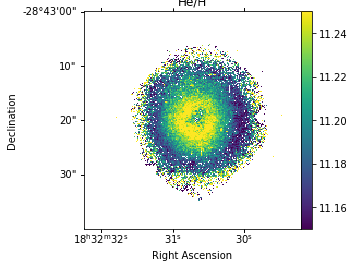

In [49]:
PL.abund_dic['He'] = PL.abund_dic['He1r_6678A'] + PL.abund_dic['He2r_4686A']
f, ax = plt.subplots(subplot_kw={'projection': PL.obs.wcs})
with np.errstate(divide='ignore', invalid='ignore'):
    PL.plot(data=12+np.log10(PL.abund_dic['He']), title='He/H', vmin=11.15, vmax=11.25, 
            type_='orig', ax=ax, mask=maskHb)
if save_plots:
    f.savefig(PDF_name+'_HeoH.pdf')    

ADF(O+) = 49.72, ADF(O++) = 27.84


/Users/christophemorisset/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
/Users/christophemorisset/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1539: RuntimeWarning: invalid value encountered in subtract
  np.subtract(arr, avg, out=arr, casting='unsafe')
/Users/christophemorisset/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1664: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


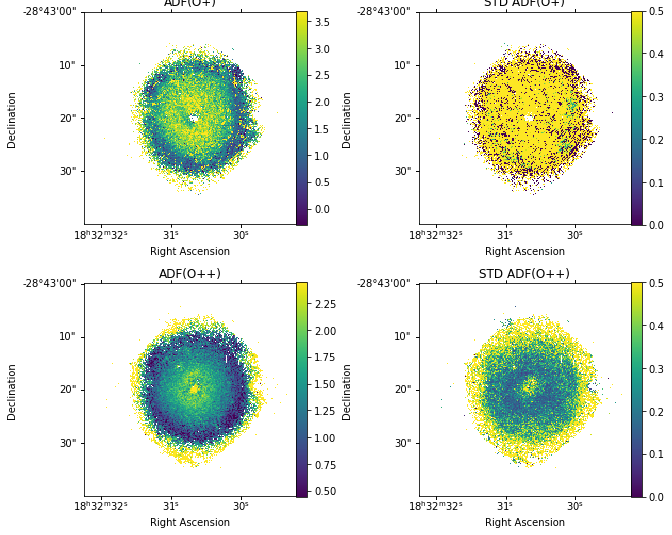

In [50]:
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2,figsize=(10,10), subplot_kw={'projection': PL.obs.wcs})

with np.errstate(divide='ignore', invalid='ignore'):
    ADF_Op = np.log10(PL.abund_dic['O1r_7773+'] / (PL.abund_dic['O2_7319A+'] + PL.abund_dic['O2_7330A+']) * 2)
    ADF_Opp = np.log10(PL.abund_dic['O2r_4649.13A'] / PL.abund_dic['O3_4959A'])
    
ADF_Op_int = ADF_Op[0]
ADF_Opp_int = ADF_Opp[0]
print('ADF(O+) = {:.2f}, ADF(O++) = {:.2f}'.format(10**ADF_Op_int, 10**ADF_Opp_int))
PL.plot(data=ADF_Op, title='ADF(O+)', ax=ax1, vmin=ADF_Op_int-2, vmax=ADF_Op_int+2, type_='median', mask=maskHb)
PL.plot(data=ADF_Op, title='STD ADF(O+)', ax=ax2, vmin=0, vmax=.5, type_='std', mask=maskHb)
PL.plot(data=ADF_Opp, title='ADF(O++)', ax=ax3, vmin=ADF_Opp_int-1, vmax=ADF_Opp_int+1, type_='median', mask=maskHb)
PL.plot(data=ADF_Opp, title='STD ADF(O++)', ax=ax4, vmin=0, vmax=.5, type_='std', mask=maskHb)

#ax1.contour(PL.obs.reshape(data=ADF_Op)[:,:,0], levels=(ADF_Op_int,), colors='r')
#ax3.contour(PL.obs.reshape(data=ADF_Opp)[:,:,0], levels=(ADF_Opp_int,), colors='r')

f.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=0.)
if save_plots:
    f.savefig(PDF_name+'_ADFs.pdf')    

/Users/christophemorisset/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1664: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/christophemorisset/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1539: RuntimeWarning: invalid value encountered in subtract
  np.subtract(arr, avg, out=arr, casting='unsafe')


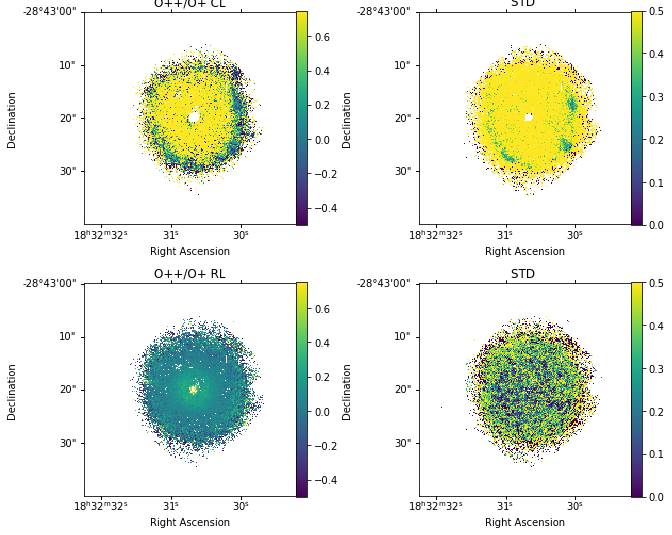

In [60]:
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2,figsize=(10,10), subplot_kw={'projection': PL.obs.wcs})

with np.errstate(divide='ignore', invalid='ignore'):
    Ion_O_RL = -np.log10(PL.abund_dic['O1r_7773+'] / PL.abund_dic['O2r_4649.13A'] )
    Ion_O_CL = -np.log10((PL.abund_dic['O2_7319A+'] + PL.abund_dic['O2_7330A+']) / 2 / PL.abund_dic['O3_4959A'])
    
PL.plot(data=Ion_O_CL, title='O++/O+ CL', ax=ax1, type_='orig', mask=maskHb, vmin=-.5, vmax=.75)
PL.plot(data=Ion_O_CL, title='STD ', ax=ax2, type_='std', mask=maskHb, vmax=0.5)
PL.plot(data=Ion_O_RL, title='O++/O+ RL', ax=ax3,  type_='orig', mask=maskHb, vmin=-.5, vmax=.75)
PL.plot(data=Ion_O_RL, title='STD ', ax=ax4, type_='std', mask=maskHb, vmax=0.5)


f.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=0.)
if save_plots:
    f.savefig(PDF_name+'_Ion_O.pdf')    

/Users/christophemorisset/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,


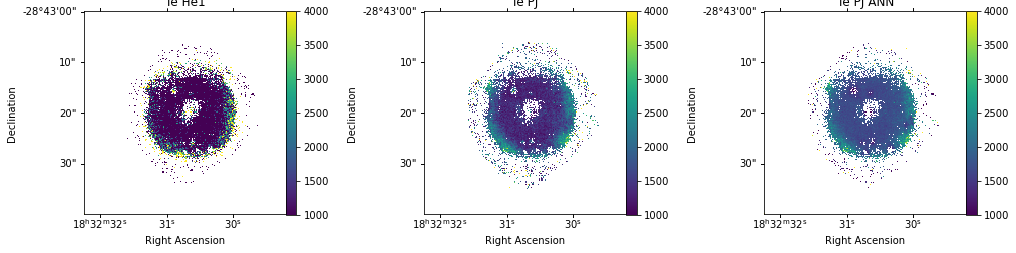

In [52]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, subplot_kw={'projection': PL.obs.wcs}, figsize=(16,6))
if obj_name == 'HF22':
    vmin=1000
    vmax=4000
else:
    vmin=1000
    vmax=9000
PL.plot(data=PL.TeNe['He1']['Te'], vmin=vmin, vmax=vmax, title='Te He1', ax=ax1, SN_cut=4, label_cut='He1r_7281A', mask=maskHb)
PL.plot(data=PL.TeNe['PJ']['Te'], vmin=vmin, vmax=vmax,  title='Te PJ', ax=ax2, SN_cut=4, label_cut='He1r_7281A', mask=maskHb)
PL.plot(data=PL.TeNe['PJ_ANN']['Te'], vmin=vmin, vmax=vmax,  title='Te PJ ANN', ax=ax3, SN_cut=4, label_cut='He1r_7281A', mask=maskHb)
f.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.6, hspace=0.)
if save_plots:
    f.savefig(PDF_name+'_Te_altern.pdf')

<ipython-input-53-cfc24f4c032f>:8: RuntimeWarning: divide by zero encountered in log10
  med = PL.obs.reshape(12+np.log10(PL.abund_dic[line.label]))[0,0,:]
<ipython-input-53-cfc24f4c032f>:8: RuntimeWarning: invalid value encountered in log10
  med = PL.obs.reshape(12+np.log10(PL.abund_dic[line.label]))[0,0,:]


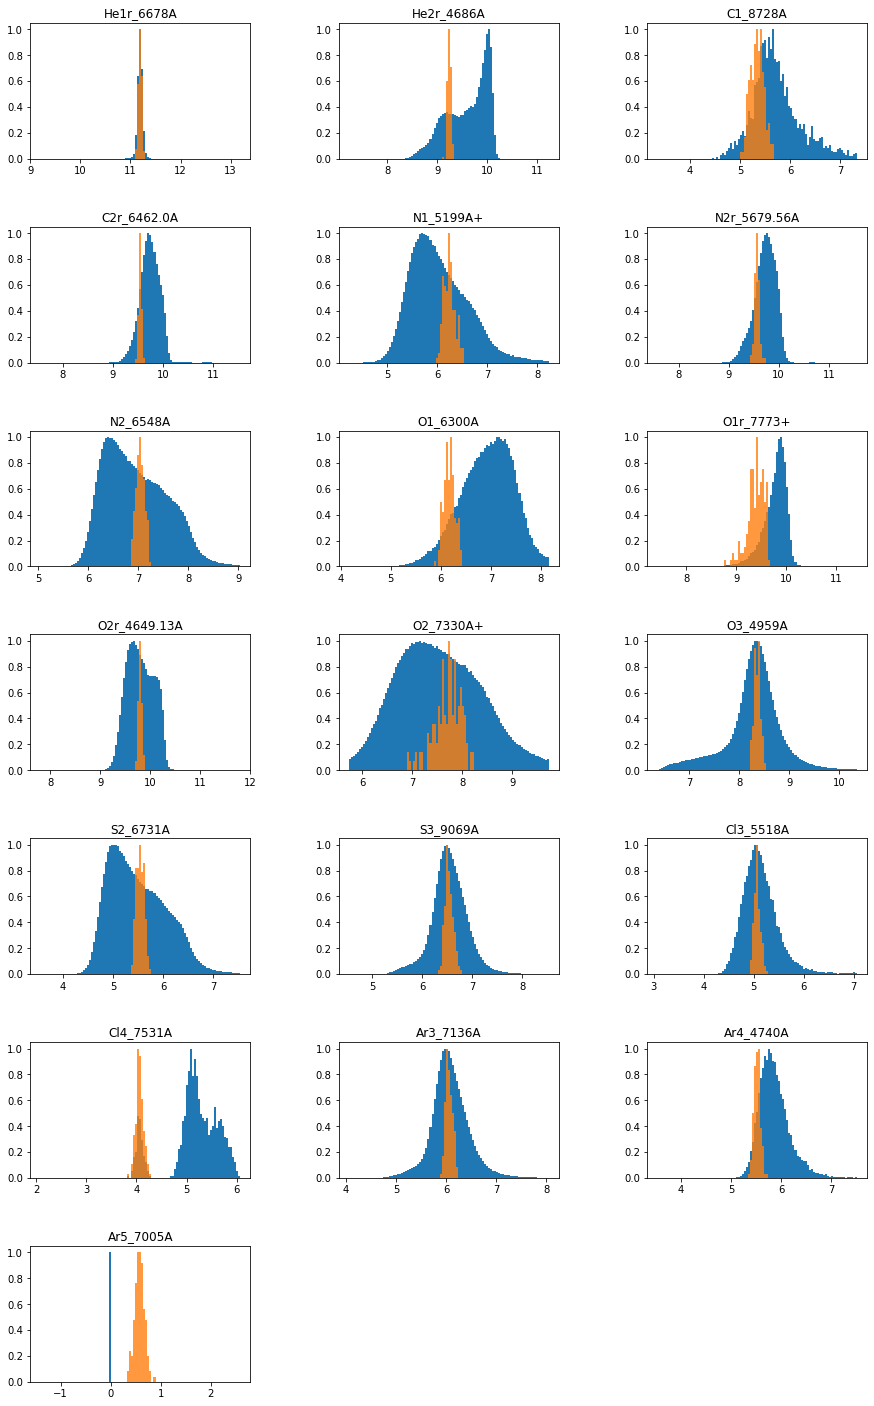

In [53]:
f, axes = plt.subplots(7,3,figsize=(15,25))
i_axes = 0
for line in PL.obs.getSortedLines(crit='mass'):
    if line.label in line_labels:
        if line.is_valid:
            mask = PL.get_mask_SN(line.label, 5.5)
            
            med = PL.obs.reshape(12+np.log10(PL.abund_dic[line.label]))[0,0,:]
            med0 = med[0]
            with np.errstate(divide='ignore', invalid='ignore'):
                d3d = PL.obs.reshape(12+np.log10(PL.abund_dic[line.label])) * (1-mask[..., np.newaxis])
                d2d = PL.obs.reshape(12+np.log10(PL.abund_dic[line.label]))[:,:,0] * (1-mask)
            ax=axes.ravel()[i_axes]
            num_bin = 100
            bin_lims = np.linspace(med0-2, med0+2,num_bin)
            bin_centers = 0.5*(bin_lims[:-1]+bin_lims[1:])
            bin_widths = bin_lims[1:]-bin_lims[:-1]
            
            hist1, _ = np.histogram(d3d.ravel(), bins=np.linspace(med0-2, med0+2, num_bin))
            hist2, _ = np.histogram(med.ravel(), bins=np.linspace(med0-2, med0+2, num_bin))
            with np.errstate(divide='ignore', invalid='ignore'):
                hist1 = hist1 / np.max(hist1)
                hist2 = hist2 / np.max(hist2)
            ax.bar(bin_centers, hist1, width = bin_widths, align = 'center')
            ax.bar(bin_centers, hist2, width = bin_widths, align = 'center', alpha = 0.8)
            
            ax.set_title(line.label)
            i_axes += 1
        else:
            print('{} is invalid'.format(line.label))
axes.ravel()[-2].remove()
axes.ravel()[-1].remove()
f.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=0.5)
if save_plots:
    f.savefig(PDF_name+'_hist_abunds.pdf')

In [54]:
np.std(PL.obs.reshape(PL.TeNe['He1']['Te'])[0,0,:])

nan

In [55]:
np.log10(PL.obs.extinction.getCorr(5755)[0])

0.48623649519512685

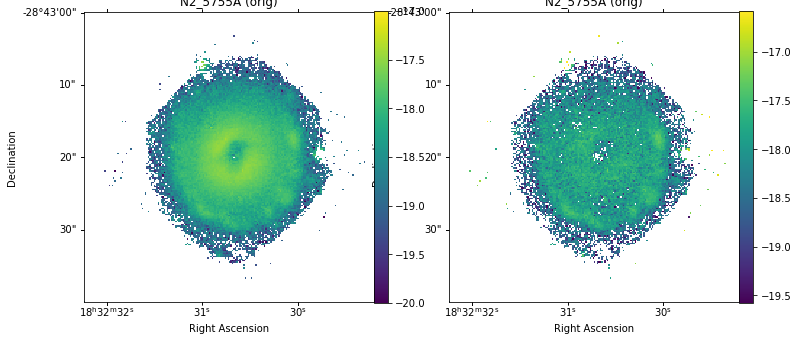

In [56]:
label = 'N2_5755A'
f, (ax1, ax2) = plt.subplots(1,2, figsize=(12, 6), subplot_kw={'projection': PL.obs.wcs})
PL.plot(label=label, type_='orig', use_log=True, returnObs=True, ax=ax1, vmin=-20, vmax=-17, mask=maskHb)
PL.plot(label=label, type_='orig', use_log=True, returnObs=False, ax=ax2, vmin=-20+0.42, vmax=-17+0.42, mask=maskHb)

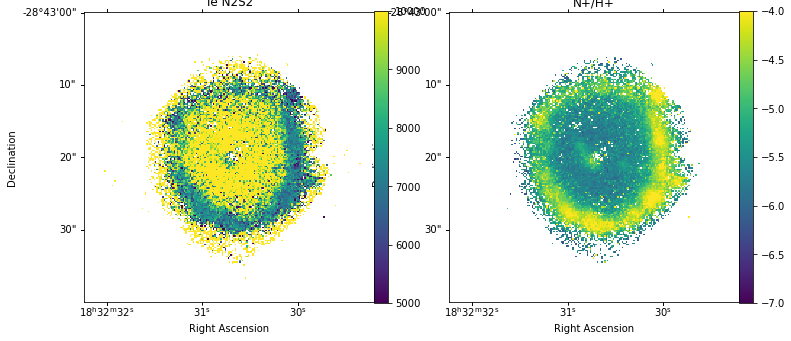

In [57]:
f, (ax1, ax2) = plt.subplots(1,2, figsize=(12, 6), subplot_kw={'projection': PL.obs.wcs})
PL.plot(ax=ax1, data=PL.TeNe['N2S2']['Te'], title='Te N2S2', vmin=5000, vmax=10000, type_='orig', mask=maskHb)
PL.plot(ax=ax2, data=PL.abund_dic['N2_5755A'], use_log=True, title='N+/H+', vmin=-7, vmax=-4 , type_='orig', mask=maskHb)


/Users/christophemorisset/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,


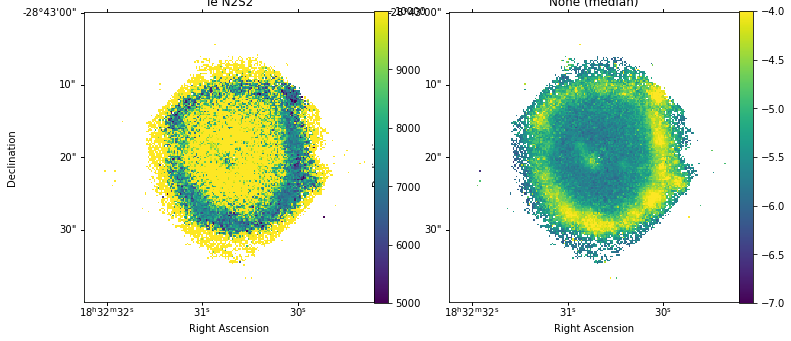

In [58]:
f, (ax1, ax2) = plt.subplots(1,2, figsize=(12, 6), subplot_kw={'projection': PL.obs.wcs})
PL.plot(ax=ax1, data=PL.TeNe['N2S2']['Te'], title='Te N2S2', vmin=5000, vmax=10000, type_='median', mask=maskHb)
PL.plot(ax=ax2, data=PL.abund_dic['N2_5755A'], use_log=True, vmin=-7, vmax=-4, type_='median', mask=maskHb)